Before you turn this problem set in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Note that in code sections, you must replace `stop("Not Implemented")` with your code. Otherwise, you will have points automatically deducted in the grading process.

**Please do not rename this file.**

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER/EXPLANATION HERE". In addition, please do not include your name on this assignment to ensure anonymity for the peer reviews.

---

# Problem 1

Part of this assignment will examine the [Gapminder](http://www.gapminder.org/) dataset, which can be imported into R as follows:

In [1]:
# This information is available within the gapminder package
install.packages("gapminder", repos = "http://cran.us.r-project.org")
library(gapminder)
data("gapminder")

package 'gapminder' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\test\AppData\Local\Temp\Rtmpon2DQd\downloaded_packages


Warning message:
"package 'gapminder' was built under R version 3.4.2"

Now there should be a data set called `gapminder` in the R global environment. Conduct a few tests on the data. First, make a data frame called `year_2007` that contains only information from the year 2007, the most recent year in the data set. Make sure that all of the columns have the same names as those in the original data set.

In [2]:
# YOUR CODE HERE
df = data.frame(gapminder)
year_2007 = subset(df, df$year == 2007)

Run the next code cell to test if the data set was correctly subsetted.

In [3]:
stopifnot(max(year_2007$year) == 2007,
         min(year_2007$year) == 2007,
         names(year_2007) == c("country", "continent", "year", "lifeExp", "pop", "gdpPercap"
),
         dim(year_2007) == c(142L, 6L))

Life expectancy in Africa is lower than much of the rest of the world. Create a new variable in the `year_2007` data frame called `in_Africa` that indicates whether a country is on the continent of Africa. Create another variable in the data frame called `lifeExp_above_60` that indicates whether the life expectancy for a country is above 60. In order to make sure the variables are easy to understand, make the values for the `in_Africa` variable either "In Africa" or "Not in Africa", and the values for the `lifeExp_above_60` variable either "Above 60" or "Not Above 60".

In [4]:
# YOUR CODE HERE
in_Africa_f = function(x = year_2007$continent) {
    one = character()
    one = ifelse(x == "Africa", "In Africa", "Not in Africa")
    return(one)
}
lifeExp_above_60_f = function(x = year_2007$lifeExp) {
    one = character()
    one = ifelse(x > 60, "Above 60", "Not Above 60")
    return(one)
}
in_Africa = in_Africa_f(year_2007$continent)
lifeExp_above_60 = lifeExp_above_60_f(year_2007$lifeExp)
year_2007 = cbind(year_2007, in_Africa, lifeExp_above_60)

Now see if the new variables were created successfully:

In [5]:
stopifnot(unique(year_2007$in_Africa) == c("Not in Africa", "In Africa"),
         unique(year_2007$lifeExp_above_60) == c("Not Above 60", "Above 60"),
         table(year_2007$lifeExp_above_60) == structure(c(99L, 43L), .Dim = 2L, .Dimnames = structure(list(
    c("Above 60", "Not Above 60")), .Names = ""), class = "table"))

In order to see the data that will be tested, make a $2 \times 2$ table of these two variables called `my_table`. Make sure that the table is readable!

In [6]:
# YOUR CODE HERE
#a = nrow(subset(year_2007, year_2007$in_Africa == "In Africa" & year_2007$lifeExp_above_60 == "Above 60"))
#b = nrow(subset(year_2007, year_2007$in_Africa == "In Africa" & year_2007$lifeExp_above_60 == "Not Above 60"))
#c = nrow(subset(year_2007, year_2007$in_Africa == "Not in Africa" & year_2007$lifeExp_above_60 == "Above 60"))
#d = nrow(subset(year_2007, year_2007$in_Africa == "Not in Africa" & year_2007$lifeExp_above_60 == "Not Above 60"))

# table = matrix(c(a,b,c,d), 2,2)
# rownames(table) = paste(c("Above 60", "Not Above 60"))
# colnames(table) = paste(c("In Africa", "Not in Africa"))
# my_table = as.table(table)
# try to code everything until I realized there is a function called "table" in R...  
my_table = table(year_2007$in_Africa, year_2007$lifeExp_above_60)
my_table

               
                Above 60 Not Above 60
  In Africa           12           40
  Not in Africa       87            3

This will check to see if the table was created correctly:

In [7]:
stopifnot(my_table == structure(c(12L, 87L, 40L, 3L), .Dim = c(2L, 2L), .Dimnames = structure(list(
    c("In Africa", "Not in Africa"), c("Above 60", "Not Above 60"
    )), .Names = c("", "")), class = "table"))

Now perform a test for equal proportions for the hypotheses
$$ \begin{array}{ll}
H_0: & p_{Africa} \geq p_{non-Africa} \\
H_1: & p_{Africa} < p_{non-Africa}
\end{array}$$
These will test to see if Africa has a significantly lower proportion of countries with a life expectancy greater than 60 years than the rest of the world. Use the continuity correction and make a 97% confidence interval for $p_{Africa} - p_{non-Africa}$. Assign the test to an object named `lifeExp_prop_test`.

In [8]:
# YOUR CODE HERE
lifeExp_prop_test = prop.test(my_table, conf.level = 0.97)
lifeExp_prop_test


	2-sample test for equality of proportions with continuity correction

data:  my_table
X-squared = 81.091, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
97 percent confidence interval:
 -0.8843439 -0.5874510
sample estimates:
   prop 1    prop 2 
0.2307692 0.9666667 


If you did this correctly, the following cell will run:

In [9]:
stopifnot(round(lifeExp_prop_test$statistic,digits = 3) == structure(81.091, .Names = "X-squared"))

---

# Problem 2

This problem will continue examining the Gapminder data set. If the R environment has been cleared, the following commands will bring the `gapminder` data frame back to the environment:

In [10]:
library(gapminder)
data("gapminder")

Create another subset of the `gapminder` data set containing information on Oceania and Europe in the year 2007. Name this data frame `EO_year_2007`, and make sure that the column names are the same as in the original data set.

In [11]:
# YOUR CODE HERE
EO_year_2007 = subset(gapminder, (gapminder$continent == "Europe" | gapminder$continent == "Oceania") & gapminder$year ==2007)

Check that the subset was done correctly:

In [12]:
stopifnot(unique(EO_year_2007$continent) == structure(4:5, .Label = c("Africa", "Americas", "Asia", "Europe", 
"Oceania"), class = "factor"),
         dim(EO_year_2007) == c(32L, 6L))

There are multiple ways to perform calculations within groups. Probably the easiest way to do this without loading any extra packages in R is to use the `aggregate` function. Formulas can be used within the `aggregate` function to easily specify the groups to aggregate over. For example, if attempting to aggregate the average (mean) `Sepal.Length` in the `iris` dataset, one can use the code:

In [13]:
data("iris")
aggregate(Sepal.Length ~ Species,data=iris,FUN=mean)

Species,Sepal.Length
setosa,5.006
versicolor,5.936
virginica,6.588


Using the `aggregate` function, find the average GDP per capita (`gdpPercap`) for Europe and Oceania. Name the aggregate data frame `gdp_means`, and make sure it has two columns with the names `continent` and `gdpPercap`. 

In [14]:
# YOUR CODE HERE
gdp_means = aggregate(gdpPercap ~ continent, data = EO_year_2007, FUN = mean)
typeof(gdp_means)

[1] "list"

If you did this correctly, the following test should run without errors:

In [15]:
stopifnot(round(gdp_means$gdpPercap,digits=2) == c(25054.48, 29810.19))

Based on the aggregation, the average GDP per capita for Oceania is higher than that of Europe. This is supported by visualizing the boxplot for the two groups:

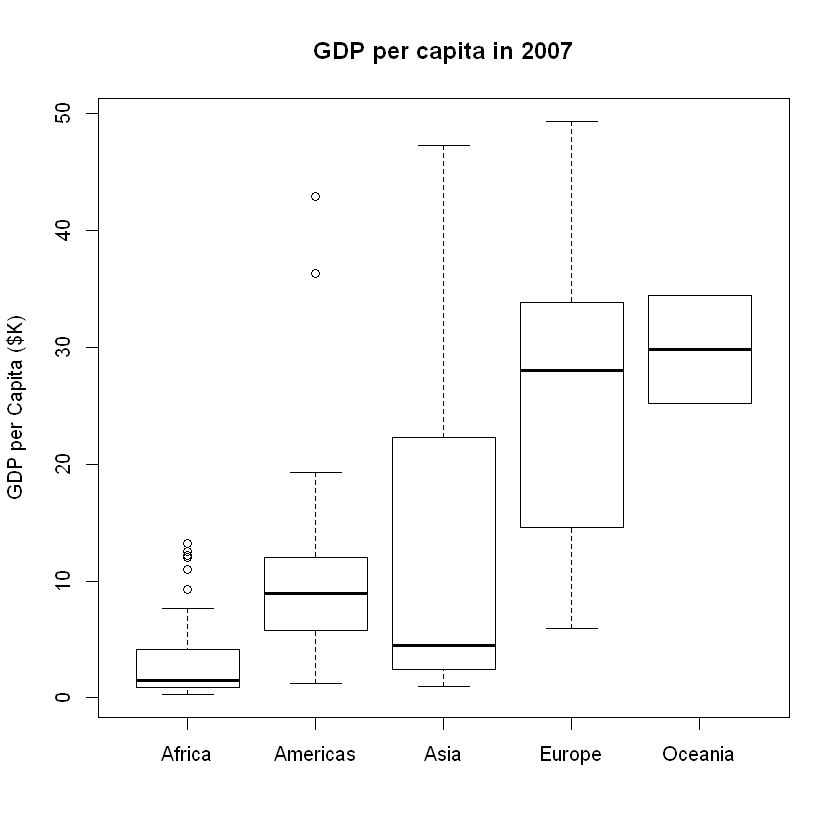

In [16]:
# Note that this will only work if you have created the year_2007 data frame in problem 1
boxplot(gdpPercap/1000 ~ continent,data=year_2007,ylab = "GDP per Capita ($K)",main = "GDP per capita in 2007")

Before testing to see if the means are significantly different for the two continents, examine whether or not the groups have equal variances. Test the hypotheses:
$$\begin{align}
H_0: & \sigma_{Europe}^2 = \sigma_{Oceania}^2 \\
H_1: & \sigma_{Europe}^2 \neq \sigma_{Oceania}^2
\end{align}$$
Name the test object `EO_gdp_var_test`.

In [17]:
# YOUR CODE HERE
x = subset(EO_year_2007, EO_year_2007$continent =="Europe")
y = subset(EO_year_2007, EO_year_2007$continent =="Oceania")
EO_gdp_var_test = var.test(x$gdpPercap, y$gdpPercap)
EO_gdp_var_test


	F test to compare two variances

data:  x$gdpPercap and y$gdpPercap
F = 3.2546, num df = 29, denom df = 1, p-value = 0.8328
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0.003251904 18.186130235
sample estimates:
ratio of variances 
          3.254632 


Check that the test was performed correctly:

In [18]:
stopifnot(round(EO_gdp_var_test$p.value,digits = 3) == 0.833)

Is the difference in the average GPA per capita *statistically significant*? Perform a t-test (using your `EO_year_2007` data frame) to see if there is a statistically significant difference in the means of GDP per capita between Europe and Oceania. Based on the variance test above, the variances in the GDPs for the two continents are not significantly different (because the p-value is higher than any reasonable value for $\alpha$), so make sure you perform your test correctly. Test the hypotheses
$$ \begin{array}{ll}
H_0: & \mu_{Europe} = \mu_{Oceania} \\
H_1: & \mu_{Europe} \neq \mu_{Oceania}
\end{array} $$
and assign the test to an object named `EO_mean_gdp_test`. 

In [21]:
# YOUR CODE HERE
EO_mean_gdp_test = t.test(x$gdpPercap, y$gdpPercap, var.equal=TRUE)
EO_mean_gdp_test


	Two Sample t-test

data:  x$gdpPercap and y$gdpPercap
t = -0.55833, df = 30, p-value = 0.5808
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -22151.11  12639.70
sample estimates:
mean of x mean of y 
 25054.48  29810.19 


The following test will work if you successfully coded the hypothesis test:

In [22]:
stopifnot(round(EO_mean_gdp_test$p.value,digits = 3) == 0.581)

Based on the test output, the average GDP per capita is not significantly different for Oceania and Europe, as the p-value is much higher than any reasonable $\alpha$-level (this is usually set to 0.05). 

Not so fast! One of the assumptions of using the t-test is that the underlying distributions for each of the groups is normal or approximately normal. The following plot shows the densities for the two groups in the sample:

In [ ]:
plot(density(subset(EO_year_2007,continent == "Oceania")$gdpPercap/1000),
     xlim = c(0,60),
     xlab = "GDP per capita ($K)",
     col="blue",
     lwd=2,
     main = "GDP per Capita - Density Curves")
lines(density(subset(EO_year_2007,continent == "Europe")$gdpPercap/1000),
      col='red',
      lwd=2)
legend("topright",legend = c("Europe","Oceania"),col = c("red","blue"),lwd=2)

Neither of the curves looks very much like the normal density curve (do a Google search if that isn't familiar). This suggests that the t-test might not be the correct method to use. Instead, conduct a Mann-Whitney test on the following hypotheses:
$$\begin{align}
H_0: & m_{Europe} = m_{Oceania} \\
H_1: & m_{Europe} \neq m_{Oceania} 
\end{align}$$
In this case, $m$ represents the median of each group. Name the test object `EO_gdp_mann_whitney`.

In [23]:
# YOUR CODE HERE
EO_gdp_mann_whitney = wilcox.test(x$gdpPercap, y$gdpPercap)
EO_gdp_mann_whitney


	Wilcoxon rank sum test

data:  x$gdpPercap and y$gdpPercap
W = 24, p-value = 0.6815
alternative hypothesis: true location shift is not equal to 0


Finally, check to see that the test was conducted correctly:

In [24]:
stopifnot(round(EO_gdp_mann_whitney$p.value,digits=3) == 0.681)

Since the p-value is still much higher than a reasonable $\alpha$-level (remember, this is usually set to 0.05), the medians of the two groups are not significantly different. 

---

# Problem 3

In the context of hypothesis testing using data in a contingency table, a test of proportions can be used when the dimensions of the tables are $2 \times 2$ or $1 \times 2$, though data in the latter case are rarely represented in a contingency table. However, if the contingency table has dimensions greater then $2 \times 2$, a test of proportions won't work without simplifying the table, as was done in Problem 1. For a higher-dimension contingency table, Pearson's $\chi^2$ test can be used. In order to show this, begin by again subsetting the `gapminder` data to look at only the information from the year 2007. In addition, use the `cut` function to create a new variable *within* the subsetted data frame called `gdp_bin` such that the `gdpPercap` variable is grouped by whether the GDP per capita is in the sets (0,10000], (10000,20000], (20000,30000], (30000,40000], or (40000,50000]. Name the subsetted data frame `problem_3`. Note that R will name the bins using scientific notation for the numbers by default. This should not be changed.

In [25]:
library(gapminder)
data("gapminder")
# YOUR CODE HERE
year_2007 = subset(gapminder, gapminder$year == 2007)
gdp_bin = cut(year_2007$gdpPercap, breaks = c(0,1e+4, 2e+4, 3e+4, 4e+4, 5e+4))
problem_3 = cbind(year_2007, gdp_bin)

Check to make sure this was done correctly:

In [29]:
stopifnot(table(problem_3$continent,problem_3$gdp_bin) == structure(c(47L, 16L, 20L, 5L, 0L, 5L, 7L, 3L, 6L, 0L, 0L, 0L, 
6L, 6L, 1L, 0L, 1L, 2L, 11L, 1L, 0L, 1L, 2L, 2L, 0L), .Dim = c(5L, 
5L), .Dimnames = structure(list(c("Africa", "Americas", "Asia", 
"Europe", "Oceania"), c("(0,1e+04]", "(1e+04,2e+04]", "(2e+04,3e+04]", 
"(3e+04,4e+04]", "(4e+04,5e+04]")), .Names = c("", "")), class = "table"))

Now conduct Pearson's $\chi^2$ test to see if there is an association between which continent a country is on and its GDP per capita. Name the test object `gdp_continent_chisq`. Do not change any of the default options for the test in R. Note: R will return a warning message for this test because there are cells in the contingency table with small expected values. Ignore this warning in this assignment, but not in research!

In [30]:
# YOUR CODE HERE
test_table = table(year_2007$continent, year_2007$gdpPercap)
gdp_continent_chisq = chisq.test(test_table)
gdp_continent_chisq

Warning message in chisq.test(test_table):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  test_table
X-squared = 568, df = 564, p-value = 0.4449


Finally, check to see that the test performed correctly: 

In [28]:
stopifnot(round(gdp_continent_chisq$statistic,digits=3) == structure(73.731, .Names = "X-squared"))

ERROR: Error: round(gdp_continent_chisq$statistic, digits = 3) == structure(73.731,  .... is not TRUE


Based on this test, there is a clear relationship!